In [42]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn import preprocessing
from scipy import stats
import inspect
from numpy import median
from scipy.stats import skew
from scipy.stats import boxcox_normmax
from scipy.special import boxcox1p

In [43]:
train_data = pd.read_csv('train.csv')

In [44]:
sns.set(color_codes=True)
x = np.random.normal(size=100,scale=0.1,loc=0)

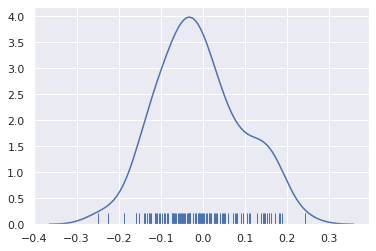

In [22]:
sns.distplot(x, hist=False , kde=True,rug=True);

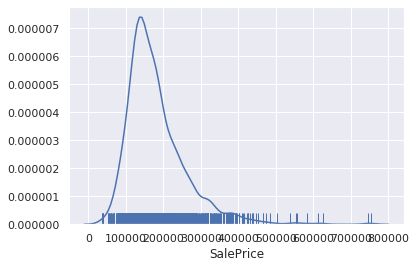

In [23]:
sns.distplot(train_data['SalePrice'], hist=False , kde=True,rug=True);

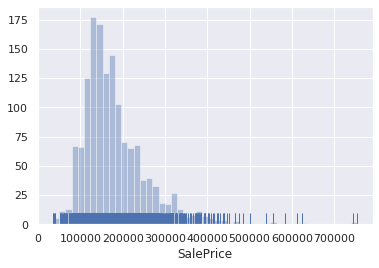

In [24]:
sns.distplot(train_data['SalePrice'], hist=True,kde=False ,rug=True);

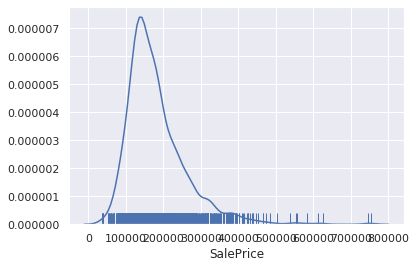

In [25]:
sns.distplot(train_data['SalePrice'], hist=False , kde=True,rug=True);

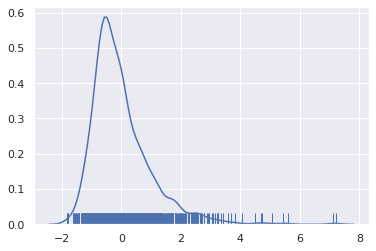

In [26]:
sns.distplot(preprocessing.scale(train_data['SalePrice'].astype(float)), hist=False , kde=True,rug=True);

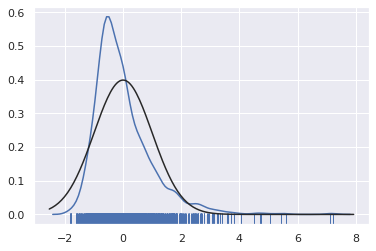

In [27]:
sns.distplot(preprocessing.scale(train_data['SalePrice'].astype(float)), hist=False , kde=True,rug=True,fit=stats.norm);

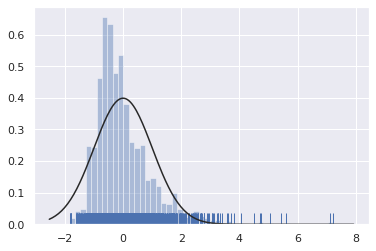

In [28]:
sns.distplot(preprocessing.scale(train_data['SalePrice'].astype(float)), hist=True , kde=False,rug=True,fit=stats.norm);

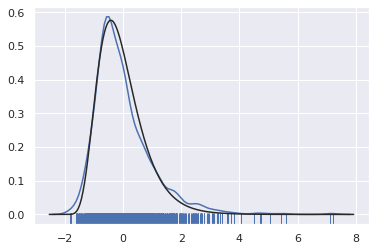

In [12]:
#целевая переменная соответствует логнормальному распределению
class LogNormWrapper:
    def fit(self,data):
        return stats.lognorm.fit(data)
    def pdf(self,x,s,loc,scale):
        return stats.lognorm.pdf(x,0.35,loc,scale)
wrapper = LogNormWrapper()    
sns.distplot(preprocessing.scale(train_data['SalePrice'].astype(float)), hist=False , kde=True,rug=True,fit=wrapper)

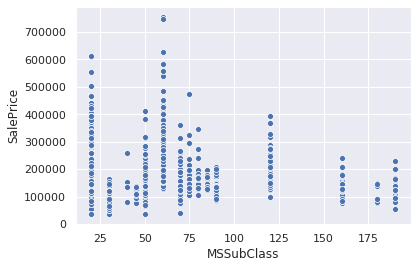

In [13]:
sns.scatterplot(x="MSSubClass", y="SalePrice", data=train_data)

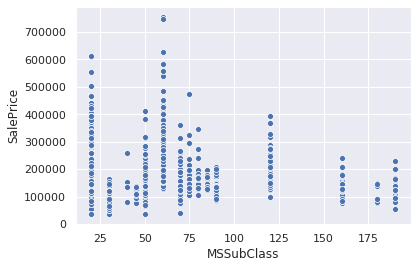

In [14]:
sns.scatterplot(x="MSSubClass", y="SalePrice", data=train_data)

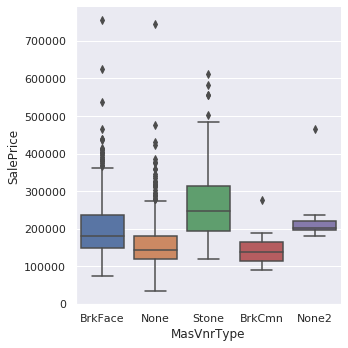

In [15]:

sns.catplot(x="MasVnrType", y="SalePrice", kind="box", data=train_data.fillna(value="None2"));

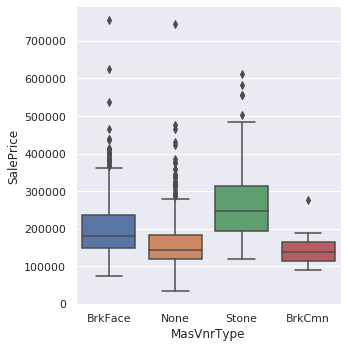

In [16]:
#assume na is same as none
sns.catplot(x="MasVnrType", y="SalePrice", kind="box", data=train_data.fillna(value="None"));

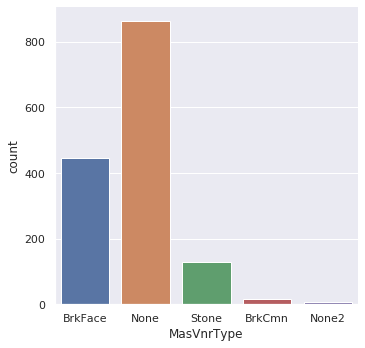

In [17]:
sns.catplot(x="MasVnrType", kind="count", data=train_data.fillna(value="None2"));

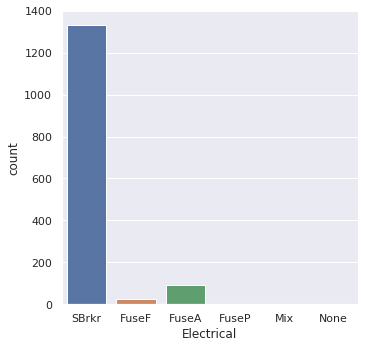

In [18]:
sns.catplot(x="Electrical", kind="count", data=train_data.fillna(value="None"));

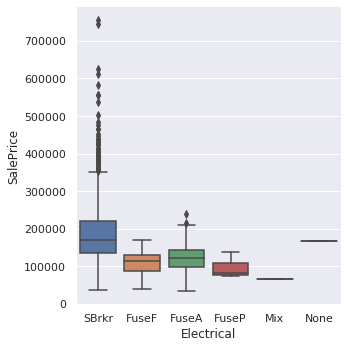

In [19]:
sns.catplot(x="Electrical", y="SalePrice", kind="box", data=train_data.fillna(value="None"));

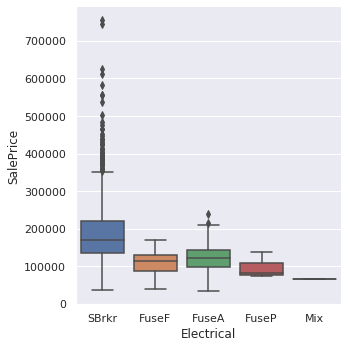

In [20]:
sns.catplot(x="Electrical", y="SalePrice", kind="box", data=train_data);

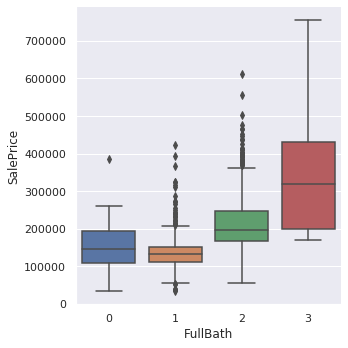

In [21]:
sns.catplot(x="FullBath", y="SalePrice", kind="box", data=train_data);

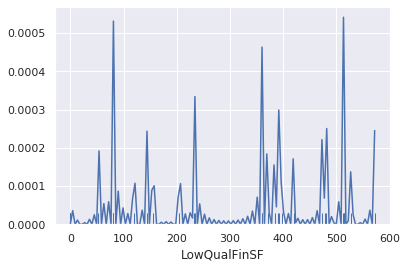

In [22]:
sns.distplot(train_data['LowQualFinSF'], hist=False,kde=True ,rug=True);

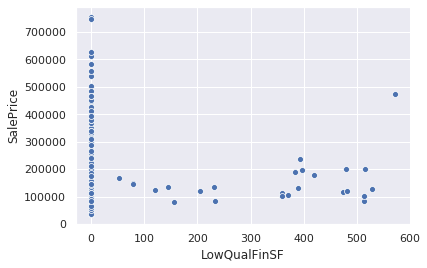

In [23]:
sns.scatterplot(x="LowQualFinSF", y="SalePrice", data=train_data)

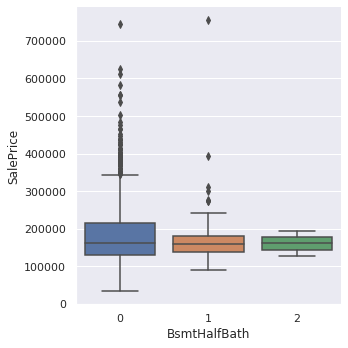

In [24]:
sns.catplot(x="BsmtHalfBath", y="SalePrice", kind="box", data=train_data);

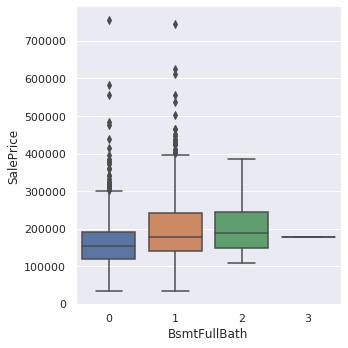

In [25]:
sns.catplot(x="BsmtFullBath", y="SalePrice", kind="box", data=train_data);

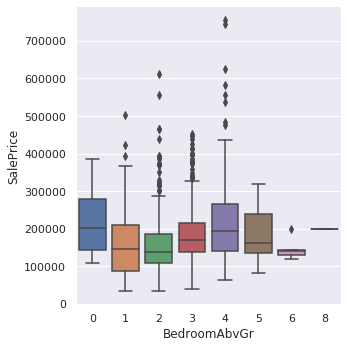

In [26]:
sns.catplot(x="BedroomAbvGr", y="SalePrice", kind="box", data=train_data);

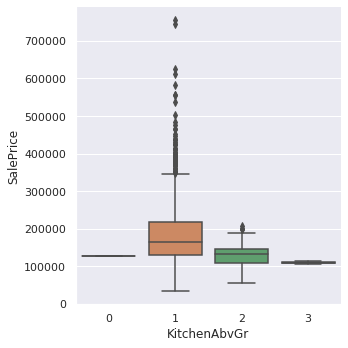

In [27]:
sns.catplot(x="KitchenAbvGr", y="SalePrice", kind="box", data=train_data);

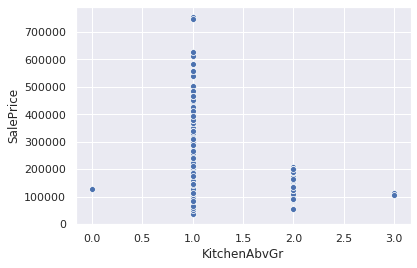

In [28]:
sns.scatterplot(x="KitchenAbvGr", y="SalePrice", data=train_data)

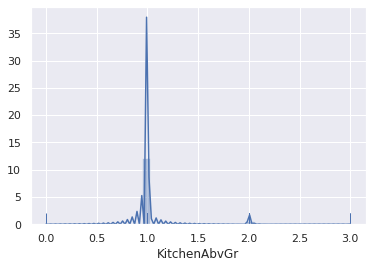

In [29]:
sns.distplot(train_data['KitchenAbvGr'], hist=True,kde=True ,rug=True);

/home/victor/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/home/victor/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


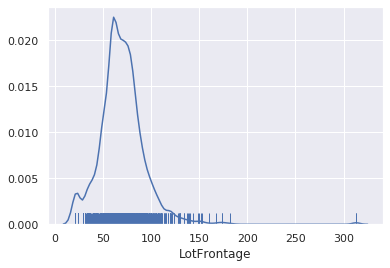

In [30]:
sns.distplot(train_data['LotFrontage'], hist=False,kde=True ,rug=True);

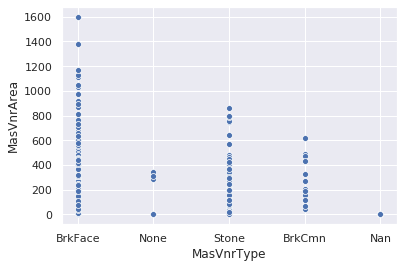

In [15]:
train_data['MasVnrArea'] = train_data['MasVnrArea'].fillna(value = 0)
train_data['MasVnrType'] = train_data['MasVnrType'].fillna(value = 'Nan')
sns.scatterplot(x="MasVnrType", y="MasVnrArea", data=train_data)

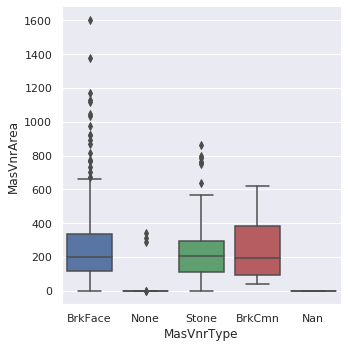

In [16]:
sns.catplot(x="MasVnrType", y="MasVnrArea", kind="box", data=train_data);

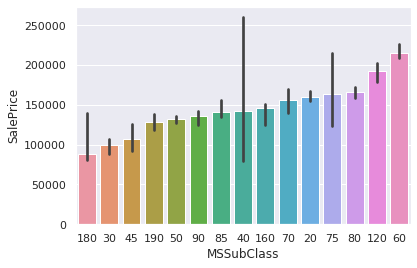

In [25]:
result = train_data.groupby(['MSSubClass'])['SalePrice'].aggregate(np.median).reset_index().sort_values('SalePrice')
sns.barplot(x='MSSubClass', y='SalePrice', data=train_data, order=result['MSSubClass'],estimator=median) 



In [26]:
result['MSSubClass']

13    180
1      30
3      45
14    190
4      50
10     90
9      85
2      40
12    160
6      70
0      20
7      75
8      80
11    120
5      60
Name: MSSubClass, dtype: int64

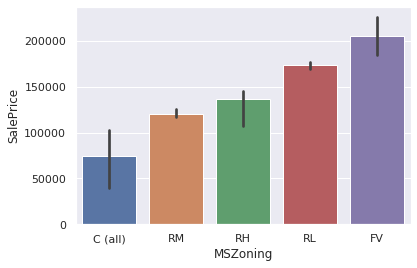

In [56]:
col = 'MSZoning'
result_neighborhood = train_data.groupby([col])['SalePrice'].aggregate(np.median).reset_index().sort_values('SalePrice')
sns.barplot(x=col, y='SalePrice', data=train_data, order=result_neighborhood[col].values.tolist(),estimator=median) 


In [35]:
result_neighborhood['Neighborhood'].values.to_list()

array(['MeadowV', 'IDOTRR', 'BrDale', 'OldTown', 'Edwards', 'BrkSide',
       'Sawyer', 'Blueste', 'SWISU', 'NAmes', 'NPkVill', 'Mitchel',
       'SawyerW', 'Gilbert', 'NWAmes', 'Blmngtn', 'CollgCr', 'ClearCr',
       'Crawfor', 'Veenker', 'Somerst', 'Timber', 'StoneBr', 'NoRidge',
       'NridgHt'], dtype=object)

In [51]:
train_data.groupby(['Neighborhood'])['Neighborhood','SalePrice'].aggregate(np.median).reset_index().sort_values('SalePrice')['Neighborhood'].values.tolist()

['MeadowV',
 'IDOTRR',
 'BrDale',
 'OldTown',
 'Edwards',
 'BrkSide',
 'Sawyer',
 'Blueste',
 'SWISU',
 'NAmes',
 'NPkVill',
 'Mitchel',
 'SawyerW',
 'Gilbert',
 'NWAmes',
 'Blmngtn',
 'CollgCr',
 'ClearCr',
 'Crawfor',
 'Veenker',
 'Somerst',
 'Timber',
 'StoneBr',
 'NoRidge',
 'NridgHt']

In [29]:
numeric_dtypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerics2 = []
for i in train_data.columns:
    if train_data[i].dtype in numeric_dtypes:
        numerics2.append(i)

skew_features = train_data[numerics2].apply(lambda x: skew(x)).sort_values(ascending=False)

high_skew = skew_features[skew_features > 0.3]
skew_index = high_skew.index
skew_index

Index(['MiscVal', 'PoolArea', 'LotArea', '3SsnPorch', 'LowQualFinSF',
       'KitchenAbvGr', 'BsmtFinSF2', 'ScreenPorch', 'BsmtHalfBath',
       'EnclosedPorch', 'OpenPorchSF', 'SalePrice', 'BsmtFinSF1', 'WoodDeckSF',
       'TotalBsmtSF', 'MSSubClass', '1stFlrSF', 'GrLivArea', 'BsmtUnfSF',
       '2ndFlrSF', 'OverallCond', 'TotRmsAbvGrd', 'HalfBath', 'Fireplaces',
       'BsmtFullBath'],
      dtype='object')

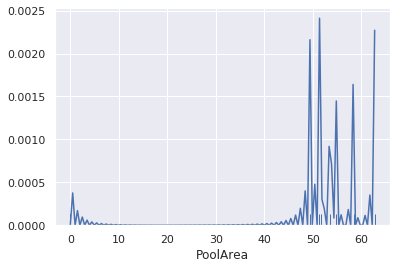

In [33]:
sns.distplot(train_data['LotArea'], hist=False , kde=True,rug=True);

In [31]:
for i in skew_index:
    train_data[i] = boxcox1p(train_data[i], boxcox_normmax(train_data[i] + 1))

/home/victor/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:3399: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/victor/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:3429: PearsonRNearConstantInputWarning: An input array is nearly constant; the computed correlation coefficent may be inaccurate.
  warnings.warn(PearsonRNearConstantInputWarning())


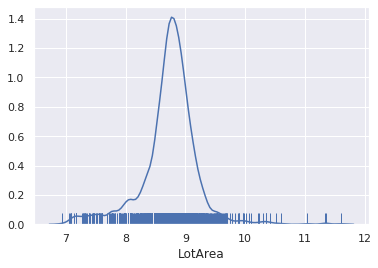

In [35]:
sns.distplot(train_data['LotArea'], hist=False , kde=True,rug=True);

In [41]:
train_data["LotFrontage"].isnull().any()

True